In [269]:
import numpy as np
import pandas as pd

from keras.layers import LSTM
from __future__ import print_function
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import math, time
from sklearn.metrics import mean_squared_error

In [271]:
data = pd.read_csv('C:/Users/juanj/Documents/GitHub/Aprendizaje-Profundo/S1CCEBSA.csv')
data.head()

,AB/2,Rha
0,2,209.439510
1,3,138.230077
2,5,85.571479
3,5,44.376310
4,8,75.483158


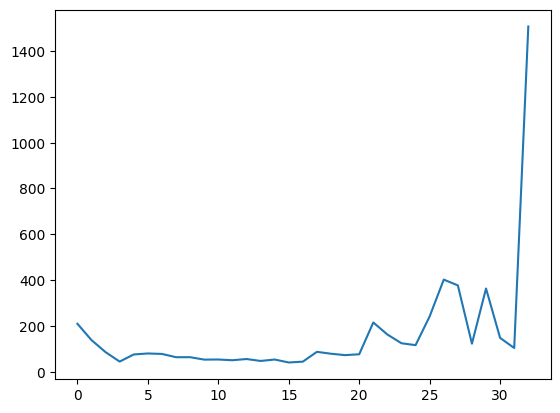

In [272]:
plt.plot(data['Rha'])
plt.show()

In [273]:
len(data)

33

In [274]:
#normalizamos

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data = min_max_scaler.fit_transform(data['Rha'].values.reshape(-1,1))

In [275]:
data.shape

(33, 1)

In [276]:
data[0:10]

array([[0.11519052],
       [0.06664329],
       [0.03074315],
       [0.00265823],
       [0.02386541],
       [0.02679921],
       [0.02543934],
       [0.01567243],
       [0.01573844],
       [0.00854231]])

In [277]:
train_size =int(len(data)* 0.7)
test_size =len(data)- train_size
train, test =data[0:train_size,:], data[train_size:len(data),:]
print(len(train),len(test))

23 10


In [278]:
def create_matrix(data, look_back=5):
    dataX, dataY = [],[]
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(data[i + look_back,0])
    return np.array(dataX), np.array(dataY)

In [279]:
x_train, y_train = create_matrix(train, look_back=5)
x_test, y_test = create_matrix(test, look_back=5)

In [280]:
display(x_train)

array([[0.11519052, 0.06664329, 0.03074315, 0.00265823, 0.02386541],
       [0.06664329, 0.03074315, 0.00265823, 0.02386541, 0.02679921],
       [0.03074315, 0.00265823, 0.02386541, 0.02679921, 0.02543934],
       [0.00265823, 0.02386541, 0.02679921, 0.02543934, 0.01567243],
       [0.02386541, 0.02679921, 0.02543934, 0.01567243, 0.01573844],
       [0.02679921, 0.02543934, 0.01567243, 0.01573844, 0.00854231],
       [0.02543934, 0.01567243, 0.01573844, 0.00854231, 0.00883604],
       [0.01567243, 0.01573844, 0.00854231, 0.00883604, 0.00668448],
       [0.01573844, 0.00854231, 0.00883604, 0.00668448, 0.01026833],
       [0.00854231, 0.00883604, 0.00668448, 0.01026833, 0.00454926],
       [0.00883604, 0.00668448, 0.01026833, 0.00454926, 0.00881109],
       [0.00668448, 0.01026833, 0.00454926, 0.00881109, 0.        ],
       [0.01026833, 0.00454926, 0.00881109, 0.        , 0.00249117],
       [0.00454926, 0.00881109, 0.        , 0.00249117, 0.03167017],
       [0.00881109, 0.        , 0.

In [281]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 5)
(17,)
(4, 5)
(4,)


In [282]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [283]:
x_train

array([[[0.11519052, 0.06664329, 0.03074315, 0.00265823, 0.02386541]],

       [[0.06664329, 0.03074315, 0.00265823, 0.02386541, 0.02679921]],

       [[0.03074315, 0.00265823, 0.02386541, 0.02679921, 0.02543934]],

       [[0.00265823, 0.02386541, 0.02679921, 0.02543934, 0.01567243]],

       [[0.02386541, 0.02679921, 0.02543934, 0.01567243, 0.01573844]],

       [[0.02679921, 0.02543934, 0.01567243, 0.01573844, 0.00854231]],

       [[0.02543934, 0.01567243, 0.01573844, 0.00854231, 0.00883604]],

       [[0.01567243, 0.01573844, 0.00854231, 0.00883604, 0.00668448]],

       [[0.01573844, 0.00854231, 0.00883604, 0.00668448, 0.01026833]],

       [[0.00854231, 0.00883604, 0.00668448, 0.01026833, 0.00454926]],

       [[0.00883604, 0.00668448, 0.01026833, 0.00454926, 0.00881109]],

       [[0.00668448, 0.01026833, 0.00454926, 0.00881109, 0.        ]],

       [[0.01026833, 0.00454926, 0.00881109, 0.        , 0.00249117]],

       [[0.00454926, 0.00881109, 0.        , 0.00249117, 0.03167

In [284]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1, 5)
(17,)
(4, 1, 5)
(4,)


In [285]:
look_back = 5
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mape', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)


Epoch 1/20
17/17 - 1s - loss: 152490.8125 - 1s/epoch - 87ms/step
Epoch 2/20
17/17 - 0s - loss: 594307.6250 - 41ms/epoch - 2ms/step
Epoch 3/20
17/17 - 0s - loss: 536490.0625 - 27ms/epoch - 2ms/step
Epoch 4/20
17/17 - 0s - loss: 409091.2188 - 29ms/epoch - 2ms/step
Epoch 5/20
17/17 - 0s - loss: 21485.2422 - 27ms/epoch - 2ms/step
Epoch 6/20
17/17 - 0s - loss: 214470.1875 - 28ms/epoch - 2ms/step
Epoch 7/20
17/17 - 0s - loss: 77894.5703 - 22ms/epoch - 1ms/step
Epoch 8/20
17/17 - 0s - loss: 348538.5625 - 26ms/epoch - 2ms/step
Epoch 9/20
17/17 - 0s - loss: 38879.4062 - 30ms/epoch - 2ms/step
Epoch 10/20
17/17 - 0s - loss: 295153.0312 - 27ms/epoch - 2ms/step
Epoch 11/20
17/17 - 0s - loss: 35569.8164 - 35ms/epoch - 2ms/step
Epoch 12/20
17/17 - 0s - loss: 398423.4062 - 36ms/epoch - 2ms/step
Epoch 13/20
17/17 - 0s - loss: 28265.9590 - 35ms/epoch - 2ms/step
Epoch 14/20
17/17 - 0s - loss: 322853.9062 - 37ms/epoch - 2ms/step
Epoch 15/20
17/17 - 0s - loss: 10447.6572 - 40ms/epoch - 2ms/step
Epoch 16/20

In [286]:
trainPrediction = model.predict(x_train)
testPrediction = model.predict(x_test)

1/1 [==============================] - 0s 20ms/step


In [287]:
trainPrediction

array([[-7.7141495e-03],
       [-2.8309340e-03],
       [ 1.5103860e-03],
       [ 1.6410891e-03],
       [-2.8107295e-04],
       [-1.1108089e-03],
       [-8.5367402e-04],
       [-6.1590754e-04],
       [-1.4941706e-04],
       [ 4.7935690e-05],
       [ 2.2955687e-04],
       [-3.0269235e-04],
       [-3.5637373e-04],
       [ 1.1987668e-03],
       [ 2.5084617e-03],
       [ 3.4042466e-03],
       [ 1.5484100e-03]], dtype=float32)

In [288]:
trainPrediction = min_max_scaler.inverse_transform(trainPrediction)
trainY = min_max_scaler.inverse_transform([y_train])
testPrediction = min_max_scaler.inverse_transform(testPrediction)
testY = min_max_scaler.inverse_transform([y_test])

In [289]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPrediction)+look_back,:] = trainPrediction

In [290]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPrediction)+(look_back*2)+1:len(data)-1,:] = testPrediction

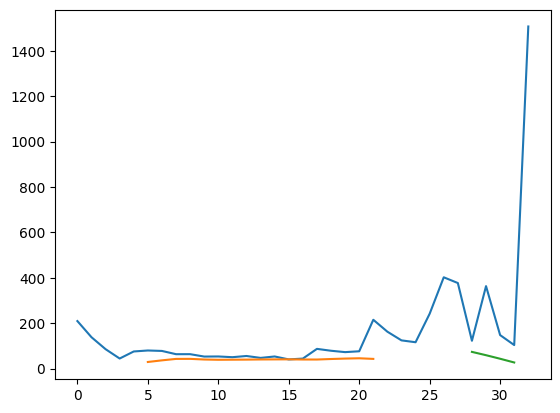

In [291]:
plt.plot(min_max_scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()